In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re

## 1 Slow Down

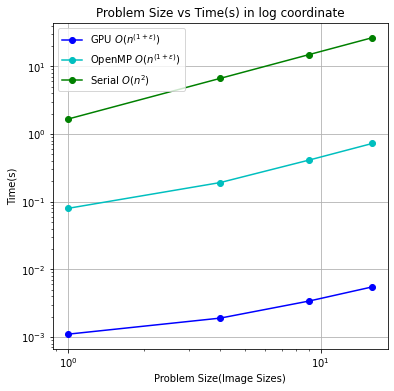

In [23]:
image_scale = [1, 4, 9, 16]
n_gpu_time = [0.0011,0.0019,0.0034,0.0055]
n_openmp_time = [0.079566,
0.191321,
0.411753,
0.724317
]
n_serial_time = [1.660690,6.626279,14.901165,26.465120]

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(image_scale, n_gpu_time, 'bo-', label=r'CUDA$')
ax.plot(image_scale, n_openmp_time, 'co-', label=r'OpenMP')
ax.plot(image_scale, n_serial_time, 'go-', label=r'Serial')

ax.set_xlabel("Problem Size(Image Sizes)")
ax.set_ylabel("Time(s)")

ax.set_title("Problem Size vs Time(s) in log coordinate")
plt.grid()
ax.legend()

## 2 Strong sclaing

In [15]:
import numpy as np
threads_num = np.array([4,8,16,32,64])
strong_time = np.array([7.332812,
3.966220,
2.101034,
1.163144,
0.757214])
serial = 26.3846

eff = serial / (threads_num * strong_time) * 100
eff

array([89.9538949 , 83.15411147, 78.48694976, 70.88707417, 54.44423571])

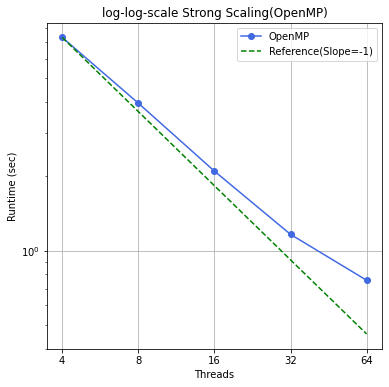

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(['4','8','16','32','64'], strong_time, marker='o', color='royalblue', label='OpenMP')
ax.plot(['4','8','16','32','64'], [7.3332, 3.666, 1.833, 0.9165, 0.4582], 'g--', label='Reference(Slope=-1)')
ax.set_xlabel("Threads")
ax.set_ylabel("Runtime (sec)")

ax.set_title("log-log-scale Strong Scaling(OpenMP)")
ax.set_yscale('log')
plt.grid()
ax.legend()

No handles with labels found to put in legend.


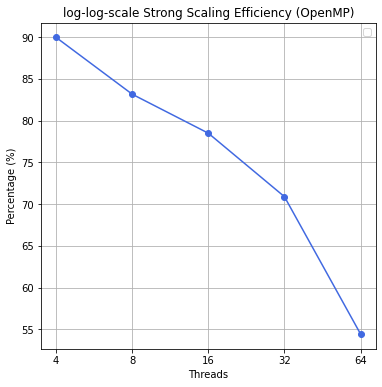

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(['4','8','16','32','64'], eff, marker='o', color='royalblue')
ax.set_xlabel("Threads")
ax.set_ylabel("Percentage (%)")

ax.set_title("log-log-scale Strong Scaling Efficiency (OpenMP)")
plt.grid()
ax.legend()

# 2 Weak Scaling

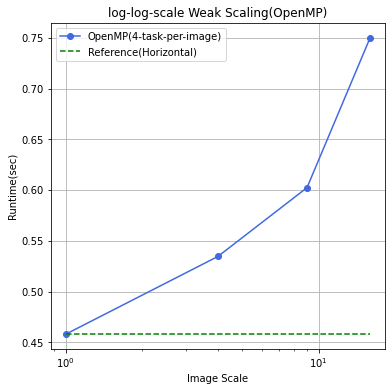

In [18]:
weak_time = np.array([0.458033,
0.534656,
0.602405,
0.750227,
])
idea_time = [0.458033,0.458033,0.458033,0.458033]
fig, ax = plt.subplots(figsize=(6,6))
ax.plot([1,4,9,16], weak_time, marker='o', color='royalblue', label='OpenMP(4-task-per-image)')
ax.plot([1,4,9,16], idea_time, 'g--', label='Reference(Horizontal)')

ax.set_xlabel("Image Scale")
ax.set_ylabel("Runtime(sec)")
ax.set_xscale('log')

ax.set_title("log-log-scale Weak Scaling(OpenMP)")
plt.grid()
ax.legend()

# 3 Serial Slow down

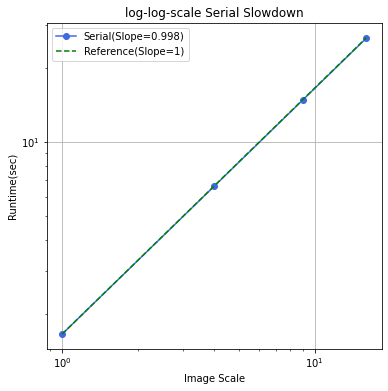

In [19]:
serial_test_time = np.array([1.660690,
6.626279,
14.901165,
26.465120,
])
idea_serial_test_time = [1.660690,6.64276,14.94621,26.57104]
fig, ax = plt.subplots(figsize=(6,6))
ax.plot([1,4,9,16], serial_test_time, marker='o', color='royalblue', label='Serial(Slope=0.998)')
ax.plot([1,4,9,16], idea_serial_test_time, 'g--', label='Reference(Slope=1)')

ax.set_xlabel("Image Scale")
ax.set_ylabel("Runtime(sec)")
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title("log-log-scale Serial Slowdown")
plt.grid()
ax.legend()

In [20]:
(np.log(26.384604) - np.log(1.658905)) / (np.log(16) - np.log(1))

0.9978482888098404